# Naive Bayes (the easy way)

We'll cheat by using sklearn.naive_bayes to train a spam classifier! Most of the code is just loading our training data into a pandas DataFrame that we can play with:

In [3]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [9]:
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

data = data.append(dataFrameFromDirectory('C:/Users/schen/Desktop/DataScience-Python3/emails/spam', 'spam'))
data = data.append(dataFrameFromDirectory('C:/Users/schen/Desktop/DataScience-Python3/emails/ham', 'ham'))


In [10]:
data.head()

,class,message
C:/Users/schen/Desktop/DataScience-Python3/emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
C:/Users/schen/Desktop/DataScience-Python3/emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
C:/Users/schen/Desktop/DataScience-Python3/emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
C:/Users/schen/Desktop/DataScience-Python3/emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...
C:/Users/schen/Desktop/DataScience-Python3/emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...


Now we will use a CountVectorizer to split up each message into its list of words, and throw that into a MultinomialNB classifier. Call fit() and we've got a trained spam filter ready to go! It's just that easy.

In [11]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Let's try it out:

In [12]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

## Activity

Our data set is small, so our spam classifier isn't actually very good. Try running some different test emails through it and see if you get the results you expect.

If you really want to challenge yourself, try applying train/test to this spam classifier - see how well it can predict some subset of the ham and spam emails.

##### Spam Classifier  in Python from Scratch

In [39]:
import nltk
from math import log,sqrt

In [41]:
spam_map = {'spam': 1, 'ham': 0}
data['class'] = data['class'] .map(spam_map)

###### Train Test Split

In [48]:
totalmails = data['message'].shape[0]
print(totalmails)

3000


In [61]:
data = data.reset_index()

In [62]:
import numpy as np

In [63]:
trainIndex,testIndex = list(),list()
for i in range (totalmails):
    if np.random.uniform(0,1)<0.75:
        trainIndex +=[i]
    else:
        testIndex += [i]
print(trainIndex)
print(testIndex)

[0, 2, 4, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 44, 46, 47, 48, 49, 50, 51, 52, 54, 56, 57, 58, 59, 61, 63, 64, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 84, 85, 88, 89, 90, 91, 95, 96, 99, 100, 101, 102, 103, 105, 109, 110, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 127, 129, 132, 133, 135, 136, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 151, 152, 153, 156, 157, 158, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 174, 175, 176, 177, 178, 179, 181, 183, 184, 186, 187, 188, 190, 191, 195, 196, 197, 198, 199, 200, 201, 204, 205, 206, 207, 208, 209, 212, 213, 214, 215, 216, 217, 218, 221, 222, 223, 224, 225, 226, 228, 229, 231, 233, 234, 235, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 269, 270, 271, 272, 273, 274, 277, 278, 279, 280, 281, 282, 283, 284, 285, 288, 290, 292, 293, 294,

In [64]:
trainData = data.loc[trainIndex]
testData = data.loc[testIndex]

In [72]:
!pip install wordcloud

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

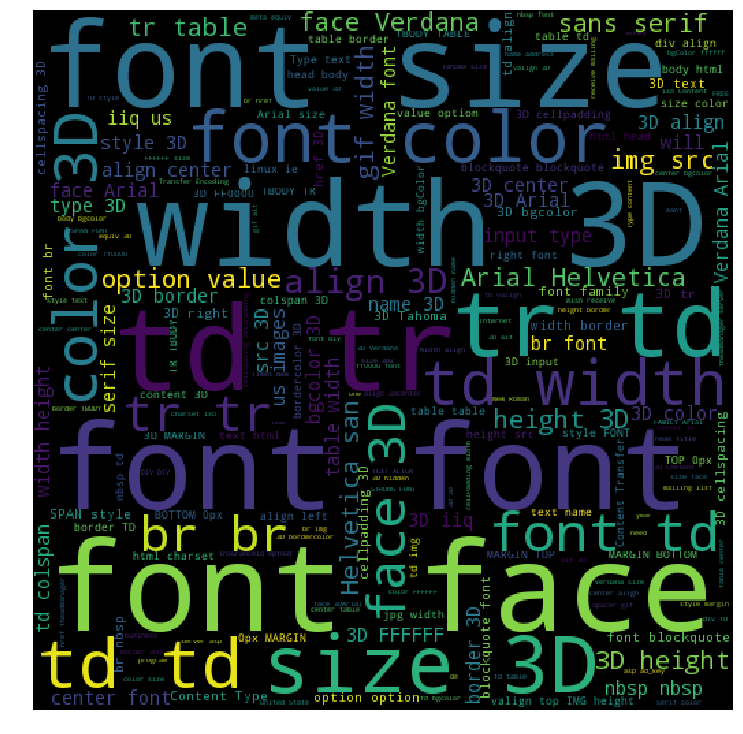

In [78]:
spam_words = ' '.join(list(data[data['class']==1]['message']))
spam_wc = WordCloud(width = 512, height = 512).generate(spam_words)
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

###### Train the model

In [80]:
# bag of words
def word_process(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w  in words if len(w) >2]
    if gram > 1:
        w = []
        for i in range()

SyntaxError: unexpected EOF while parsing (<ipython-input-80-4f88a7d3ab59>, line 3)